In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


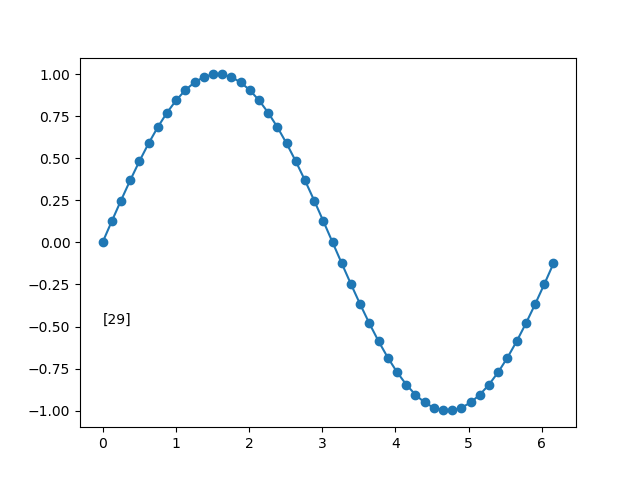

In [3]:
x = numpy.arange(50)*2*numpy.pi/50
y = numpy.sin(x)

fig, ax = plt.subplots()


plt.plot(x,y, '-o', picker=4)  
text=ax.text(0,-0.5, " ", va="bottom", ha="left")


def on_pick(event):
    thisline = event.artist
    xdata, ydata = thisline.get_data()
    ind = event.ind
    text.set_text(str(ind))

cid = fig.canvas.mpl_connect('pick_event', on_pick)


<IPython.core.display.Javascript object>


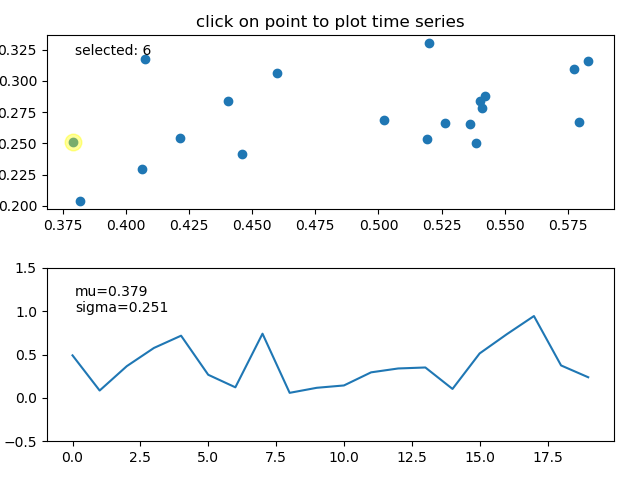

In [4]:
import numpy as np


class PointBrowser:
    """
    Click on a point to select and highlight it -- the data that
    generated the point will be shown in the lower axes.  Use the 'n'
    and 'p' keys to browse through the next and previous points
    """
    def __init__(self):
        self.lastind = 0

        self.text = ax.text(0.05, 0.95, 'selected: none',
                            transform=ax.transAxes, va='top')
        self.selected,  = ax.plot([xs[0]], [ys[0]], 'o', ms=12, alpha=0.4,
                                  color='yellow', visible=False)

    def onpress(self, event):
        if self.lastind is None: return
        if event.key not in ('n', 'p'): return
        if event.key=='n': inc = 1
        else:  inc = -1


        self.lastind += inc
        self.lastind = np.clip(self.lastind, 0, len(xs)-1)
        self.update()

    def onpick(self, event):

       if event.artist!=line: return True

       N = len(event.ind)
       if not N: return True

       # the click locations
       x = event.mouseevent.xdata
       y = event.mouseevent.ydata


       distances = np.hypot(x-xs[event.ind], y-ys[event.ind])
       indmin = distances.argmin()
       dataind = event.ind[indmin]

       self.lastind = dataind
       self.update()

    def update(self):
        if self.lastind is None: return

        dataind = self.lastind

        ax2.cla()
        ax2.plot(X[dataind])

        ax2.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f'%(xs[dataind], ys[dataind]),
                 transform=ax2.transAxes, va='top')
        ax2.set_ylim(-0.5, 1.5)
        self.selected.set_visible(True)
        self.selected.set_data(xs[dataind], ys[dataind])

        self.text.set_text('selected: %d'%dataind)
        fig.canvas.draw()

if __name__ == '__main__':
    import matplotlib.pyplot as plt

    X = np.random.rand(20, 20)
    xs = np.mean(X, axis=1)
    ys = np.std(X, axis=1)

    fig, (ax, ax2) = plt.subplots(2, 1)
    ax.set_title('click on point to plot time series')
    ax2.set_title('details')
    fig.tight_layout()
    line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance

    browser = PointBrowser()

    fig.canvas.mpl_connect('pick_event', browser.onpick)
    fig.canvas.mpl_connect('key_press_event', browser.onpress)

    plt.show()


